# データからの学習
ニューラルネットワークの特徴は、データから学習できる点にある。（すなわちデータから重みパラメーターを自動的に決定できるということ）

## データ駆動
具体的に、手書きの数字の画像を5かそうでないかを見分ける問題について考える。このとき、人間が「5」を認識するアルゴリズムをひねり出す方法と、画像から**特徴量**を抽出して、その特徴量のパターンを機械学習の技術で学習する方法が考えられる。ここでいう特徴量は、入力から本質的なデータを的確に抽出できるように設計された変換器のことを指す。
<br>
画像の特徴量は通常、ベクトルとして記述される。コンピュータービジョンの分野で有名な特徴量として、**SIFT**、**SURF**、**HOG**などが挙げられる。それらで変換されたベクトルに対して、機械学習で使用される識別器（SVMやKNN）で学習させることができる。
<br>
1つ目の方法では、人間がすべての作業を行う必要がある。また、2つ目の方法でも、特徴量に関しては人間が作成する必要がある。
<br>
しかし、ニューラルネットワークにおいては、与えられたデータをひたすら学習し、与えられた問題にパターｗンを発見しようとする。この中に人間の手による作業は無く、データをそのままの生のままで学習させることができる、

## 訓練データとテストデータ
機械学習では、**訓練データ**と**テストデータ**の2つのデータに分けて、学習や実験を行うことが一般的である。まず訓練データを用いて最適なパラメータを探索し、テストデータを用いてその訓練したモデルを評価する。これはモデルの**汎化能力**を正しく評価するために行われる。汎化能力は、未知のデータに対する能力でああり、この能力を獲得することこそが機械学習の最終的な目標である。
<br>
そのため、あるデータセットだけでパラメーターの学習と評価を行ってしまうと、正しい評価が行えなくなる。あるデータセットにだけ過度に対応してしまった状態を**過学習**といい、これを避けることは機械学習の重要な課題である。

# 損失関数
ニューラルネットワークでは、最適なパラメーターを探索するための指標として、**損失関数(lost function)**を用いる。この損失関数に任意の関数を用いることができるが、一般には、**2乗和誤差**や**交差エントロピー誤差**などが用いられる。

## 2乗和誤差
損失関数の中で最も有名なものは**2乗和誤差(sum of squared error)**でる。この関数は、以下の数式で表される。
<br>
$ \displaystyle E = \frac{1}{2} \sum_k (y_k - t_k)^2$
<br>
ここでは、$y_k$はニューラルネットワークの出力、$t_k$は教師データを表し、$k$はデータの次元数を表す。この関数をpythonで実装すると、以下のようになる。

In [1]:
import numpy as np

def sum_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

## 交差エントロピー誤差
2乗和誤差以外の損失関数として、**交差エントロピー誤差(cross entropy error)**もよく用いられる。この関数は、以下の数式であらわされる。
<br>
$ \displaystyle E = - \sum_k t_k \log y_k $
<br>
ここで、$\log$は底が$e$の自然対数($ \log_e$)を表す。$y_k$はニューラルネットワークの出力、$t_k$は正解ラベルとする(one-hot表現)。同じくpythonで実装すると以下のようになる。正解ラベルはone-hot表現での入力になるため、正解ラベル1に対応する出力の自然対数の総和を計算するということである。

In [2]:
def cross_entropy_error(y, t):
    delta = 1e-7 #マイナス無限大発生対策のための微小量
    return -np.sum(t * np.log(y + delta))

## ミニバッチ学習
機械学習では、訓練データを用いて学習を行う。これは、訓練データに対して損失関数を求め、その値をなるべく小さくするパラメータを探るという手順である。そのため、実際にはデータの個数分の損失関数を求める必要がある。しかし、データ数が多くなるとその方法は現実的ではなくなってくる。そこで、データの一部を選び出し、データ全体の近似として利用する方法がある。この抜き出した一部をミニバッチ（小さな塊）といい、このような学習手法を**ミニバッチ学習**という。
<br>
実際に、MNISTデータセットでミニバッチ学習を行ってみる。

In [3]:
import numpy as np
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True , one_hot_label=True)

#訓練データの大きさ（形）をそれぞれ出力
print(x_train.shape) 
print(t_train.shape)

#ミニバッチを作成する
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

#10個ずつ抜き出されていることがわかる
print(x_batch.shape)
print(t_batch.shape)

(60000, 784)
(60000, 10)
(10, 784)
(10, 10)


## ミニバッチに対応した交差エントロピー誤差の実装
データが1つで入力される場合と、バッチとしてまとめられた場合の両方で利用できるように先ほどの関数を改良する。

In [4]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

また、教師データがone-hot表現ではなくラベルとして与えられたとき、交差エントロピー誤差は次のように実装できる。

In [5]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 損失関数を設定する意義
ニューラルネットワークの学習においては、損失関数を最小化することで認識精度を向上させていく。実際にしている計算としては、各パラメーターの微分を計算し、その値を手がかりにより損失関数を最小とするパラメーターを更新している。認識精度を学習の指標としてしまうと、パラメーターによる変化は微小なものであり、微分した値はほぼ0であり、また変化があるとしても連続的な変化にならないため、学習をすることができない。これは、活性化関数にステップ関数でなくシグモイド関数が用いられることの理由としても言うことができる。（微分した値が0にならない）

# 数値微分
勾配法では、勾配の情報を使って、進む方向を決める。

## 微分
微分の基本式に関しては既習であるので割愛する。
微分をpythonの関数として実装すると以下のようになる。

In [6]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

上記の実装では、hをできる限り0に近い0ではない値にしたかったため、pythonの**丸め誤差**を考慮して、h=$10^{-4}$とおいた。一般に、微分における極小の値hはこの値にすることでよい結果を得ることができると知られている。また、今回行っているのは数値微分であり、真の微分（解析的な微分）とは誤差が生まれる。そのため、xを中心として前後の差分（**中心差分**という）を計算することで、誤差を減らすことができる。

## 偏微分


$f(x_0 , x_1) = x_0^2 + x_1^2$と表される2変数の関数について考える。この関数は、以下のようにして実装できる。

In [7]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

これを3次元のグラフに表すと以下のようになる。

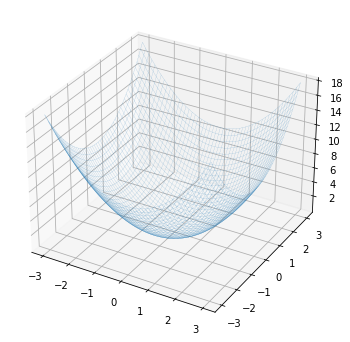

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [0] * 2
t = np.linspace(-3, 3)
x[0] = t
x[1] = t
X = np.meshgrid(x[0], x[1])

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection' : '3d'})
ax.plot_wireframe(X[0], X[1], function_2(X), linewidth=0.1)
plt.show()

この関数は変数が2つあるため、どの変数に対しての微分かを区別する必要がある。このような複数の変数からなる関数の微分を**偏微分**といい、数式では$ \frac{\partial f}{\partial x_0}$,$ \frac{\partial f}{\partial x_1}$のように書き表される。

# 勾配
上記の例では、$x_0$と$x_1$の偏微分について扱った。この2つの偏微分をまとめて($ \frac{\partial f}{\partial x_0}$,$ \frac{\partial f}{\partial x_1}$)と計算することを考える。このような形式で、すべての変数の偏微分をベクトルの形にまとめたものを**勾配**と言う。勾配はpythonでは以下のように実装できる。

In [9]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) #xと同じ形状の配列を作成
    
    for idx in range(x, size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
    
    return grad

## 勾配法
勾配の方向は必ずその関数の最小値を指すとは限らないが、少なくともその地点では最も値を少なくすることができる方向である。そこで用いられるのが**勾配法**である。勾配法では、現在の場所から勾配方向に一定の距離進み、その先でも勾配を求めてまたその手順を繰り返す。勾配法は機械学習の最適化問題でよく用いられ、特にニューラルネットワークにおいてよく用いられる。勾配法を数式で表すと、次のようになる。
<br>
$ x_0 = x_0 - \eta \frac{\partial f}{\partial x_0}$
<br>
$ x_1 = x_1 - \eta \frac{\partial f}{\partial x_1}$

この式の$\eta$は更新の量を表す。ニューラルネットワークの学習においては、**学習率**と呼ばれる。これは、1回の学習でどれだけ学習しパラメーターを更新するかを定める値である。勾配降下法（最小値を目指す勾配法）は、pythonでは以下のように実装される。

In [10]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

学習率は、高すぎても値が発散してしまい、低すぎてもほとんどパラメーターが更新されずに終わってしまう。そのため、適切案学習率を定めると言うことが重要な問題となる。

## ニューラルネットワークに対する勾配
ニューラルネットワークにおいても、勾配を求める必要がある。ここで言う勾配は、重みパラメータに関する損失関数の勾配である。例えば重み$W$を持つニューラルネットワークがあり、損失関数を$L$で表す場合を考える。この際、数式で表すと以下のようになる。
<br>
<br>
$\large W = \begin{pmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23}
\end{pmatrix}$
<br>
<br>
$\large \frac{\partial L}{\partial W} = \begin{pmatrix}
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} \\
\frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}}
\end{pmatrix}$
<br><br>
$\frac{\partial L}{\partial W}$の各要素は、それぞれの要素に対する偏微分から構成される。ここではオライリー・ジャパンから発行されている書籍「ゼロから作る Deep Learning」より提供されている関数を用いて勾配を求める実装を行う。

In [11]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) #ガウス分布で初期化
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [12]:
net = simpleNet()
print(net.W)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

print(np.argmax(p))

t = np.array([0,0,1])
net.loss(x, t)

[[ 1.73634974 -0.64359086  0.82690296]
 [-0.15211201 -1.38373803  1.53260741]]
[ 0.90490903 -1.63151874  1.87548845]
2


0.34277361227850495

In [13]:
def f(W):
    return net.loss(x, t)

dw = numerical_gradient(f, net.W)
print(dw)

[[ 0.16135007  0.01277064 -0.17412071]
 [ 0.2420251   0.01915596 -0.26118106]]


このようにして、勾配を計算することができた。

# 学習アルゴリズムの実装
ニューラルネットワークの学習は大きく以下の4つのステップに分けられる。
1. ミニバッチ
    - 訓練データからランダムに一部のデータを抜き出す。
1. 勾配の算出
    - ミニバッチの損失関数を減らすために各重みパラメータの勾配を求める。
1. パラメータの更新
    - 重みパラメーターを勾配方向に微小量だけ更新する。
1. 繰り返す
    - 上記の手順を繰り返す。
<br>
この方法は勾配降下法と呼ばれ、特にミニバッチによって無作為に選ばれたデータを使用していることから、**確率的勾配降下法**と呼ばれる。多くのディープラーニングのフレームワークでは、頭文字をとって**SGD**という名前の関数で実装されることが多い。

## 2層ニューラルネットワークの実装
まず、2層のニューラルネットワークを``TwoLayerNet``という名前のクラスとして実装する。

In [1]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient
import numpy as np


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

## ミニバッチ学習の実装
上記で実装した``TwoLayerNet``クラスを対象に、MNISTデータセットを用いて学習を行う。

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
print("imported librarys")
from mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print("Data loaded.")

train_loss_list = []

iters_num = 10000  # ハイパーパラメータ
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

print("loop start")
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    print("batched")
    # 勾配の計算
    grad = network.numerical_gradient(x_batch, t_batch)
    print("gradiented.")
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    #学習記録の更新
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    print(str(i+1) + "loop(s) ended")
# グラフの描画
x = np.arange(iters_num)
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.ylim(0, 9)
plt.show()

imported librarys
Data loaded.
loop start
batched
gradiented.
1loop(s) ended
batched
gradiented.
2loop(s) ended
batched
gradiented.
3loop(s) ended
batched
gradiented.
4loop(s) ended
batched
gradiented.
5loop(s) ended
batched
gradiented.
6loop(s) ended
batched
gradiented.
7loop(s) ended
batched
